# Projecto Zipline

### Importamos todas las librerás requeridas y sus respectivos magics para buen funcionamiento

In [1]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from zipline.api import order, record, symbol
%matplotlib notebook

### Realizamos la importacion de los datos de 4 diferentes empresas para pruebas: Tesla, Google, Apple y Nvidia, y definimos el intervalo de tiempo

In [2]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2017,12,31)
tsla = web.DataReader('TSLA','google',start,end)
goog = web.DataReader('GOOG','google',start,end)
appl = web.DataReader('AAPL','google',start,end)
nvda = web.DataReader('NVDA','google',start,end)
#plt.get_backend()

/home/jorge/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


### Revisamos informacion de los datos recibidos

In [3]:
tsla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-01-02,35.00,35.45,34.70,35.36,1194710
2013-01-03,35.18,35.45,34.75,34.77,741941
2013-01-04,34.80,34.80,33.92,34.40,673993
2013-01-07,34.80,34.80,33.90,34.34,441909
2013-01-08,34.50,34.50,33.11,33.68,1283985


In [4]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 5 columns):
Open      1259 non-null float64
High      1259 non-null float64
Low       1259 non-null float64
Close     1259 non-null float64
Volume    1259 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [5]:
#tsla.to_csv('tsla.csv')
#appl.to_csv('appl.csv')
#goog.to_csv('goog.csv')
#nvda.to_csv('nvda.csv')

### Graficamos los valores de apertura de cada empresa por separado y al final en un conjunto

<IPython.core.display.Javascript object>


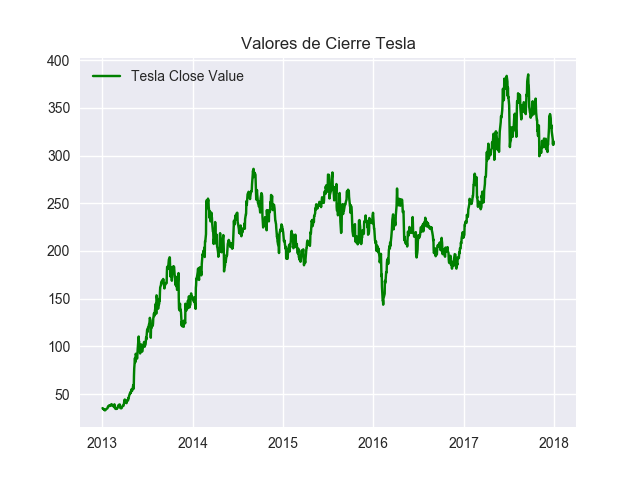

In [6]:
plt.figure(1)
tsla_plot = plt.subplot()
#tsla_close = plt.subplot()
tsla_plot.plot(tsla['Close'],color='green')
plt.legend(['Tesla Close Value'],loc="upper left")
plt.title('Valores de Cierre Tesla')

<IPython.core.display.Javascript object>


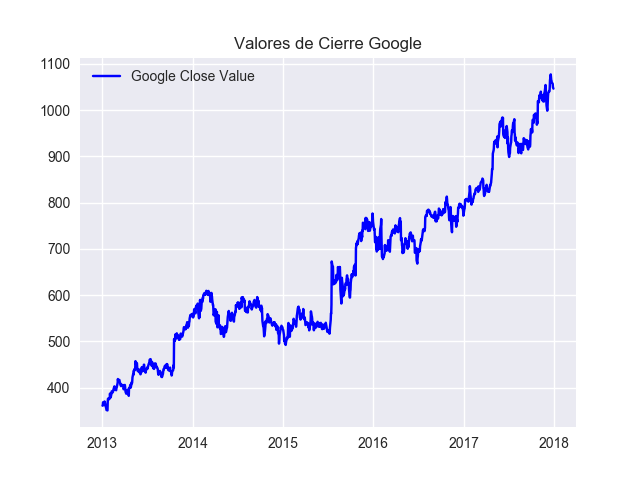

In [7]:
plt.figure(2)
goog_plot = plt.subplot()
goog_plot.plot(goog['Close'],color='blue')
plt.legend(['Google Close Value'],loc="upper left")
plt.title('Valores de Cierre Google')

<IPython.core.display.Javascript object>


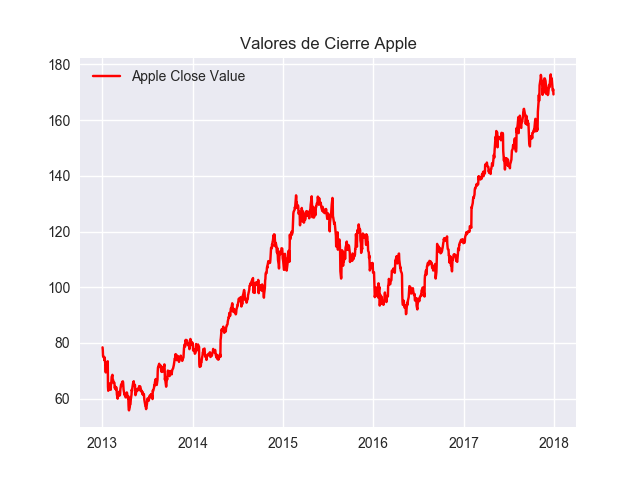

In [8]:
plt.figure(3)
appl_plot = plt.subplot()
appl_plot.plot(appl['Close'],color='red')
plt.legend(['Apple Close Value'],loc="upper left")
plt.title('Valores de Cierre Apple')

<IPython.core.display.Javascript object>


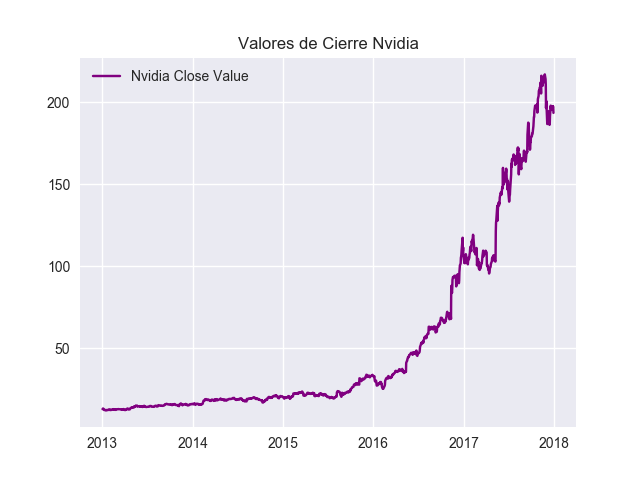

In [9]:
plt.figure(4)
nvda_plot = plt.subplot()
nvda_plot.plot(nvda['Close'],color='purple')
plt.legend(['Nvidia Close Value'],loc="upper left")
plt.title('Valores de Cierre Nvidia')

<IPython.core.display.Javascript object>


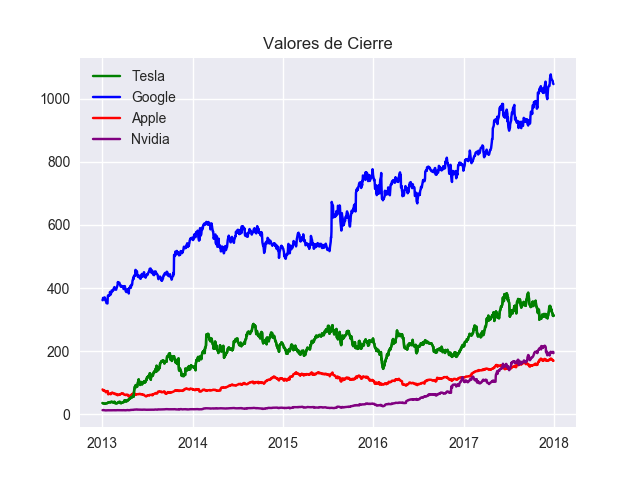

In [10]:
plt.figure(5)
tsla_plot=plt.subplot()
goog_plot=plt.subplot()
appl_plot=plt.subplot()
nvda_plot=plt.subplot()
tsla_plot.plot(tsla['Close'],color='green')
goog_plot.plot(goog['Close'],color='blue')
appl_plot.plot(appl['Close'],color='red')
nvda_plot.plot(nvda['Close'],color='purple')
plt.legend(['Tesla','Google','Apple','Nvidia'],loc="upper left")
plt.title('Valores de Cierre')

### Creamos los promedios moviles para empezar sera a 20 días

In [11]:
def prom_mov(df, dias):
    list=[]
    suma_i = 0
    t=0
    suma_f = 0
    for x in range(dias-1):
        list.append(0)
    for i in range(len(df)-dias+1):
        suma_i = 0
        for j in range(dias):
            suma_i += df[i+j]
        t +=1
        prom1 = suma_i/dias
        suma_f += prom1
        list.append(prom1)
    promf = suma_f/t
    return list

In [12]:
print(len(tsla['Close']))
print(len(prom_mov(tsla['Close'],20)))
tsla['PromedioMov20']=prom_mov(tsla['Close'],20)

1259
1259


In [13]:
tsla.head(25)

,Open,High,Low,Close,Volume,PromedioMov20
Date,,,,,,
2013-01-02,35.00,35.45,34.70,35.36,1194710,0.0000
2013-01-03,35.18,35.45,34.75,34.77,741941,0.0000
2013-01-04,34.80,34.80,33.92,34.40,673993,0.0000
2013-01-07,34.80,34.80,33.90,34.34,441909,0.0000
2013-01-08,34.50,34.50,33.11,33.68,1283985,0.0000
2013-01-09,34.01,34.19,33.40,33.64,697979,0.0000
2013-01-10,33.87,33.99,33.38,33.53,922405,0.0000
2013-01-11,34.04,34.04,32.11,32.91,1563274,0.0000
2013-01-14,33.08,33.38,32.85,33.26,925018,0.0000


<IPython.core.display.Javascript object>


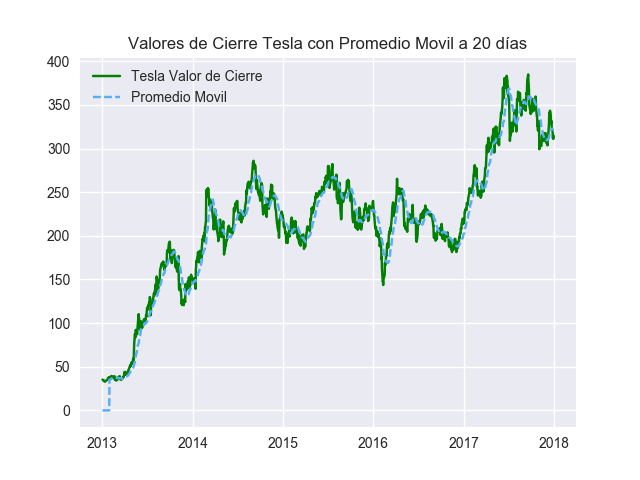

In [20]:
plt.figure(6)
tsla_pm = plt.subplot()
tsla_close = plt.subplot()
tsla_close.plot(tsla['Close'],color='green')
tsla_pm.plot(tsla['PromedioMov20'],color='#58ACFA',linestyle='--')
plt.legend(['Tesla Valor de Cierre','Promedio Movil'],loc="upper left")
plt.title('Valores de Cierre Tesla con Promedio Movil a 20 días')

In [15]:
%load_ext zipline

In [16]:
#%%zipline --start 2013-1-1 --end 2017-12-31
#%%zipline --start 2000-1-1 --end 2014-1-1


In [17]:
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)